In [26]:
import numpy as np
import pandas as pd
import data_pipeline2 as dp
import seaborn as sns
from test_fncs import recursive_pred
import torch.nn as nn
import torch

import training_models as tm
import ml_models
from sklearn.metrics import r2_score

In [36]:
df_train, df_test = dp.get_cmapss_data(0, 80, data_dir ='data_synthetic', chosen_sensor = 11)

input_sizes = [5,10,20,40]

config = {
    'input_size' : 30,
    'lr' : 1e-4,
    'batch_size' : 32,
    'hidden_size' : 8,
    'output_size' : 40,
    'layer_amt' : 3
    }

In [31]:
mod = tm.train_model(config, it_amt=0, model_fnc = ml_models.CNN, data_dir='data_synthetic')

print(mod)

Finished Training
CNN(
  (conv_layers): Sequential(
    (0): Conv1d(1, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(8, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): Conv1d(8, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): ReLU()
  )
  (fc): Linear(in_features=240, out_features=40, bias=True)
)


In [32]:
results = []

for input_size in input_sizes:
    for output_size in output_sizes:
        
        # Update configuration
        config['input_size'] = input_size
        config['output_size'] = output_size

        # Load data
        dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                             outp_size=config['output_size'], batch_size=32, shuffle=False)

        preds, xs, ys, txs, tys, sensors = [], [], [], [], [], []

        # Loop through batches
        for data in dataloader:
            x, y, tx, ty, sensor = data

            xs.append(x)
            ys.append(y)
            txs.append(tx)
            tys.append(ty)
            sensors.append(sensor)

        xs = torch.cat(xs).detach().numpy()
        ys = torch.cat(ys).detach().numpy()
        txs = torch.cat(txs).detach().numpy()
        tys = torch.cat(tys).detach().numpy()
        sensors = torch.cat(sensors).detach().numpy()
        
        

        # Save results
        results.append({
            'input_size': input_size,
            'output_size': output_size,
            'xs': xs.tolist(),
            'ys' : ys.tolist(),
            'txs' : txs.tolist(),
            'tys' : tys.tolist(),
            'sensors' : sensors.tolist(),  # Save as list if needed
        })



# Create DataFrame
df_answers = pd.DataFrame(results)

df_answers

,input_size,output_size,xs,ys,txs,tys,sensors
0,5,1,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673], [1.9075376987457275], [...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0], [7.0], [8.0], [9.0], [10.0], [11.0], [...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
1,5,5,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0], [7.0, 8.0, 9.0, 1...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
2,5,10,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
3,5,20,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
4,5,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[1.2535301446914673, 1.9075376987457275, 1.02...","[[1.0, 2.0, 3.0, 4.0, 5.0], [2.0, 3.0, 4.0, 5....","[[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
5,10,1,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[0.4867626428604126], [1.4677739143371582], [...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[11.0], [12.0], [13.0], [14.0], [15.0], [16.0...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
6,10,5,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[0.4867626428604126, 1.4677739143371582, 1.58...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[11.0, 12.0, 13.0, 14.0, 15.0], [12.0, 13.0, ...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
7,10,10,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[0.4867626428604126, 1.4677739143371582, 1.58...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
8,10,20,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[0.4867626428604126, 1.4677739143371582, 1.58...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."
9,10,40,"[[1.1294941902160645, 1.5692578554153442, 1.18...","[[0.4867626428604126, 1.4677739143371582, 1.58...","[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,...","[[11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18...","[[10.0], [10.0], [10.0], [10.0], [10.0], [10.0..."


In [90]:
loss = nn.MSELoss()

results = []
output_size = 40

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size


    # Load model
    state_dict = torch.load(f'models/mlp/output_size{output_size}input_size{input_size}.pt')
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.MLP, data_dir='data_synthetic')
    mod.load_state_dict(state_dict)
    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds, ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        ys.append(y)
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()

    ys = torch.concat(ys)

    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


    # Save results
    results.append({
        'model' : 'MLP',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })

    # Also store in df_test
    #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_results = pd.DataFrame(results)

C:\Users\livb\AppData\Local\Temp\ipykernel_13424\2251851244.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/mlp/output_size{output_size

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\2251851244.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/mlp/output_size{output_size

Finished Training
Finished Training


In [91]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    config['output_size'] = output_size

    # Load model
    state_dict = torch.load(f'models/gru/output_size{output_size}input_size{input_size}.pt')
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.GRU, data_dir='data_synthetic')
    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


    # Save results
    results.append({
        'model' : 'GRU',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

C:\Users\livb\AppData\Local\Temp\ipykernel_13424\3328340197.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/gru/output_size{output_size

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\3328340197.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/gru/output_size{output_size

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\3328340197.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/gru/output_size{output_size

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\3328340197.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/gru/output_size{output_size

Finished Training


In [92]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    config['output_size'] = output_size

    # Load model
    state_dict = torch.load(f'models/lstm/output_size{output_size}input_size{input_size}.pt')
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.LSTM, data_dir='data_synthetic')
    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,  ys = [], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)


        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)


    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


    # Save results
    results.append({
        'model' : 'LSTM',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })

    # Also store in df_test
    #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

C:\Users\livb\AppData\Local\Temp\ipykernel_13424\2985982270.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/lstm/output_size{output_siz

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\2985982270.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/lstm/output_size{output_siz

Finished Training
Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\2985982270.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/lstm/output_size{output_siz

In [93]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    config['output_size'] = output_size

    # Load model
    state_dict = torch.load(f'models/cnn/output_size{output_size}input_size{input_size}.pt')
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.CNN, data_dir='data_synthetic')
    mod.load_state_dict(state_dict)

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    preds,ys = [], []
    tot_loss = 0.0


    mod.eval()


    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)

        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)

    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


    # Save results
    results.append({
        'model' : 'CNN',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })

    # Also store in df_test
    #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

C:\Users\livb\AppData\Local\Temp\ipykernel_13424\393585260.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/cnn/output_size{output_size}

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\393585260.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/cnn/output_size{output_size}

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\393585260.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/cnn/output_size{output_size}

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\393585260.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/cnn/output_size{output_size}

Finished Training


In [94]:
"""results = []

for input_size in input_sizes:
    for output_size in output_sizes:
        
        # Update configuration
        config['input_size'] = input_size
        config['output_size'] = output_size

        # Load model
        state_dict = torch.load(f'models/transformer/output_size{output_size}input_size{input_size}.pt')
        mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.Transformer, data_dir='data_synthetic')
        mod.load_state_dict(state_dict)
        
        mod.eval()

        # Load data
        dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                             outp_size=config['output_size'], batch_size=32, shuffle=False)

        preds, xs, ys, txs, tys, sensors = [], [], [], [], [], []
        tot_loss = 0.0

        # Loop through batches
        for data in dataloader:
            x, y, tx, ty, sensor = data
            pred = mod(x,torch.zeros_like(y))
            loss_val = loss(pred, y).item()

            preds.append(pred)

            tot_loss += loss_val

        # Convert to tensor
        preds_tensor = torch.cat(preds).detach().numpy()

        # Save results
        results.append({
            'model' : 'Transformer',
            'input_size': input_size,
            'output_size': output_size,
            'loss': tot_loss / len(dataloader),
            'predictions': preds_tensor.tolist(),  # Save as list if needed
        })

        # Also store in df_test
        #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor


# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])"""

"results = []\n\nfor input_size in input_sizes:\n    for output_size in output_sizes:\n        \n        # Update configuration\n        config['input_size'] = input_size\n        config['output_size'] = output_size\n\n        # Load model\n        state_dict = torch.load(f'models/transformer/output_size{output_size}input_size{input_size}.pt')\n        mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.Transformer, data_dir='data_synthetic')\n        mod.load_state_dict(state_dict)\n        \n        mod.eval()\n\n        # Load data\n        dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], \n                                             outp_size=config['output_size'], batch_size=32, shuffle=False)\n\n        preds, xs, ys, txs, tys, sensors = [], [], [], [], [], []\n        tot_loss = 0.0\n\n        # Loop through batches\n        for data in dataloader:\n            x, y, tx, ty, sensor = data\n            pred = mod(x,torch.zeros_like(y))\n       

In [95]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    config['output_size'] = output_size

    # Load model
    state_dict = torch.load(f'models/gcn/output_size{output_size}input_size{input_size}.pt')
    mod = tm.train_gcn(config, it_amt=0, data_dir='data_synthetic')
    mod.load_state_dict(state_dict)

    mod.eval()

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, gcn = True, shuffle=False)

    preds,  ys =[], []
    tot_loss = 0.0

    # Loop through batches
    for data in dataloader:
        x, y = data.x, data.y
        y = np.concatenate(y)
        if y.ndim==1:
            y = y.reshape(-1,1)

        pred = mod(x, data.edge_index)

        loss_val = loss(pred.float(), torch.from_numpy(y).float()).item()

        preds.append(pred)
        ys.append(torch.from_numpy(y))

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.cat(preds).detach()#.numpy()
    ys = torch.concat(ys)
    
    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


    # Save results
    results.append({
        'model' : 'GCN',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })

    # Also store in df_test
    #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor


# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\752851477.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/gcn/output_size{output_size}

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\752851477.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/gcn/output_size{output_size}

Finished Training


In [96]:
results = []

for input_size in input_sizes:

    # Update configuration
    config['input_size'] = input_size
    config['output_size'] = output_size

    # Load model
    state_dict = torch.load(f'models/baseline/output_size{output_size}input_size{input_size}.pt')
    mod = tm.train_model(config, it_amt=0, model_fnc=ml_models.Baseline, data_dir='data_synthetic')
    mod.load_state_dict(state_dict)

    # Load data
    dataloader, idx = dp.get_loaded_data(df_test, win_size=config['input_size'], 
                                         outp_size=config['output_size'], batch_size=32, shuffle=False)

    tot_loss = 0.0

    mod.eval()

    preds, ys = [],[]


    # Loop through batches
    for data in dataloader:
        x, y, tx, ty, sensor = data
        pred = mod(x)
        loss_val = loss(pred, y).item()

        preds.append(pred)
        ys.append(y)

        tot_loss += loss_val

    # Convert to tensor
    preds_tensor = torch.concat(preds).detach()#.numpy()
    ys = torch.concat(ys)

    mses = (torch.mean((preds_tensor - ys)**2, axis = 0)).tolist()


    # Save results
    results.append({
        'model' : 'Baseline',
        'input_size': input_size,
        'mses' : mses,  # Save as list if needed
    })
    # Also store in df_test
    #df_test[f'mlp_outp{output_size}_inp{input_size}'] = preds_tensor

# Create DataFrame
df_this = pd.DataFrame(results)
df_results = pd.concat([df_this, df_results])

Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\2341065981.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/baseline/output_size{output

Finished Training
Finished Training


C:\Users\livb\AppData\Local\Temp\ipykernel_13424\2341065981.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f'models/baseline/output_size{output

Finished Training


In [97]:
df_results

,model,input_size,mses
0,Baseline,5,"[0.2573159337043762, 0.25476595759391785, 0.25..."
1,Baseline,10,"[0.23693117499351501, 0.23719216883182526, 0.2..."
2,Baseline,20,"[0.23059500753879547, 0.23151946067810059, 0.2..."
3,Baseline,40,"[0.2308877557516098, 0.23282484710216522, 0.23..."
0,GCN,5,"[0.24769627595808483, 0.2503675752774284, 0.25..."
1,GCN,10,"[0.24569604142617896, 0.2423634057272193, 0.24..."
2,GCN,20,"[0.2353188685156226, 0.23708666774475914, 0.23..."
3,GCN,40,"[0.24277433379963875, 0.24279389367209714, 0.2..."
0,CNN,5,"[0.2562437355518341, 0.254675030708313, 0.2590..."
1,CNN,10,"[0.23717845976352692, 0.23823551833629608, 0.2..."


In [98]:
df_results["indices"] = df_results["mses"].apply(lambda x: list(range(1, len(x) + 1)))
df_results
# Explode both `mses` and `indices` into separate rows
df_long = df_results.explode(["mses", "indices"])

df_long

,model,input_size,mses,indices
0,Baseline,5,0.257316,1
0,Baseline,5,0.254766,2
0,Baseline,5,0.258852,3
0,Baseline,5,0.258194,4
0,Baseline,5,0.257142,5
...,...,...,...,...
3,MLP,40,0.378305,36
3,MLP,40,0.38707,37
3,MLP,40,0.390427,38
3,MLP,40,0.414488,39


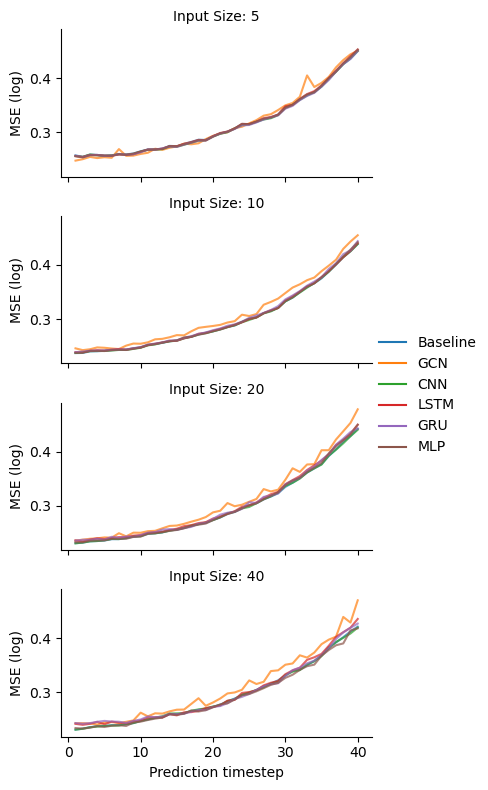

In [114]:
# Create separate plots for each `input_size`

g = sns.FacetGrid(df_long, row ="input_size", sharey=True, height = 2, aspect = 2)  # Different plot per `input_size`
g.map_dataframe(sns.lineplot, x="indices", y="mses", hue="model", alpha = 0.7)


# Adjust aesthetics
g.set_axis_labels("Prediction timestep", "MSE (log)")
g.set_titles("Input Size: {row_name}")
g.add_legend()

plt.show()

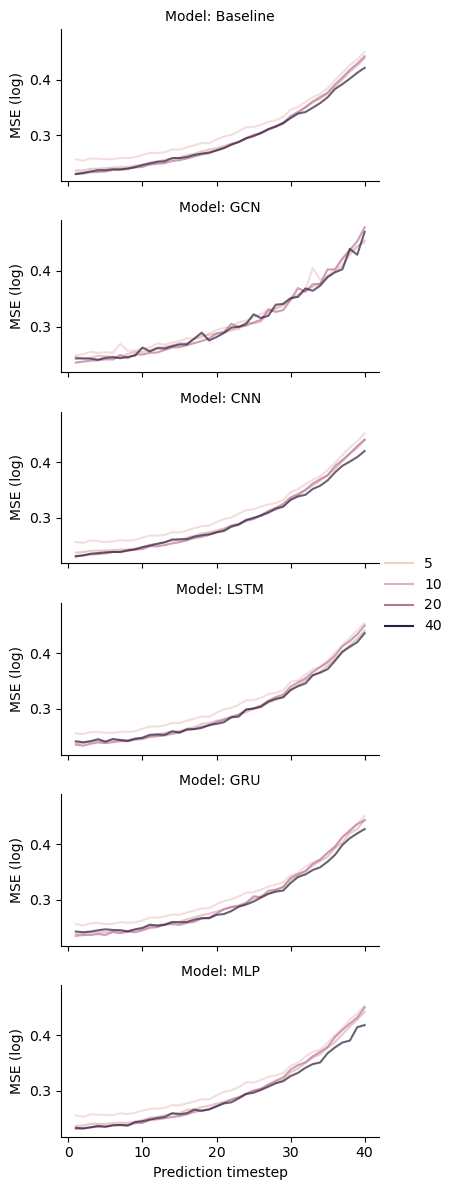

In [117]:
# Create separate plots for each `input_size`

g = sns.FacetGrid(df_long, row ="model", sharey=True, height = 2, aspect = 2)  # Different plot per `input_size`
g.map_dataframe(sns.lineplot, x="indices", y="mses", hue="input_size", alpha = 0.7)


# Adjust aesthetics
g.set_axis_labels("Prediction timestep", "MSE (log)")
g.set_titles("Model: {row_name}")
g.add_legend()

plt.show()

In [25]:
df_results.to_csv('results/model_results.csv')

In [26]:
df_answers.to_csv('results/model_answers.csv')

In [45]:
df_results

,model,input_size,output_size,loss,predictions
0,Baseline,5,1,0.258061,"[[1.099663496017456], [1.1225848197937012], [1..."
1,Baseline,5,5,0.258780,"[[1.0943284034729004, 1.090895652770996, 1.095..."
2,Baseline,5,10,0.264274,"[[1.0818965435028076, 1.08206307888031, 1.0844..."
3,Baseline,5,20,0.280811,"[[1.0738946199417114, 1.0732184648513794, 1.07..."
4,Baseline,5,40,0.313093,"[[1.0540786981582642, 1.0586038827896118, 1.04..."
...,...,...,...,...,...
15,MLP,40,1,0.233380,"[[1.2438881397247314], [1.3153572082519531], [..."
16,MLP,40,5,0.235131,"[[1.2880436182022095, 1.260267734527588, 1.277..."
17,MLP,40,10,0.240874,"[[1.269455075263977, 1.288851261138916, 1.3011..."
18,MLP,40,20,0.257552,"[[1.2717398405075073, 1.2799222469329834, 1.27..."
